# Week 1: Introduction to Computer vision

* Image representation
* Color and color conversions
* Filters
* Blurring
* Edges

In [1]:
# Imports - Recommended in the first cell

import matplotlib, cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Image representation

OpenCV is a library designed specifically for Computer vision tasks. It is free for use under the open-source BSD license.

In [2]:
# read an image
img = cv2.imread('images/K&N.jpg')

print(img.shape)

(1280, 793, 3)


In [3]:
# show image
print(img)

[[[ 88  63 175]
  [ 90  65 179]
  [ 80  58 176]
  ...
  [ 85   5 126]
  [ 85   5 126]
  [ 84   4 125]]

 [[ 73  48 160]
  [ 80  55 169]
  [ 76  54 172]
  ...
  [ 85   5 126]
  [ 85   5 126]
  [ 84   4 125]]

 [[ 59  35 147]
  [ 71  48 162]
  [ 74  55 171]
  ...
  [ 84   3 126]
  [ 84   3 126]
  [ 84   3 126]]

 ...

 [[  5   4  43]
  [  5   4  44]
  [  5   3  45]
  ...
  [  6   2  84]
  [  5   1  83]
  [  7   3  85]]

 [[ 10   9  43]
  [  9   7  43]
  [  8   5  44]
  ...
  [  6   2  84]
  [  5   1  83]
  [  5   1  83]]

 [[ 11  10  42]
  [ 10   9  41]
  [  8   6  42]
  ...
  [  6   2  84]
  [  6   2  84]
  [  4   0  82]]]


In [4]:
type(img)

numpy.ndarray

![Image tensor](images/img_tensor.jpg "Image Tensor")


Source: https://www.slideshare.net/BertonEarnshaw/a-brief-survey-of-tensors

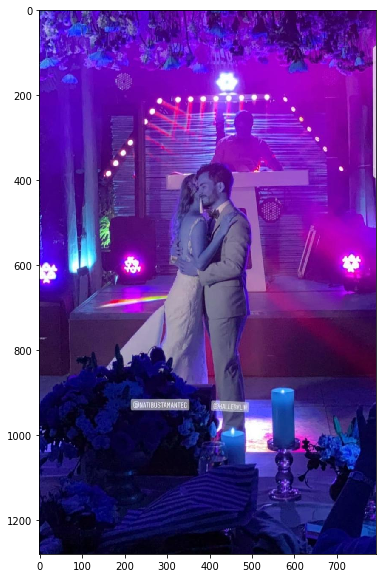

In [5]:
# show image with matplotlib
plt.figure(figsize=(20,10))
plt.imshow(img)

.

.

.

.

.

.

### Colors and color conversions

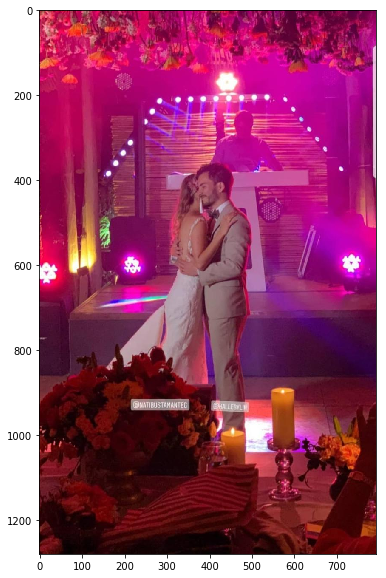

In [6]:
# convert image to RGB color for matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(img)

In [7]:
# convert image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# grayscale image represented as a 2-d array
print(gray_img.shape)

(1280, 793)


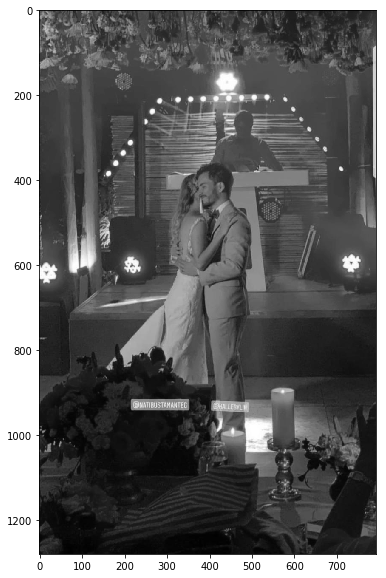

In [8]:
plt.figure(figsize=(20,10))
plt.imshow(gray_img, cmap='gray')

## Why is this so good for us?

### Finding the average color of an image

In [9]:
# find average per row
# np.average() takes in an axis argument which finds the average across that axis. 
average_color_per_row = np.average(img, axis=0)

# find average across average per row
average_color = np.average(average_color_per_row, axis=0)

# convert back to uint8
average_color = np.uint8(average_color)
print(average_color)


[136  34  81]


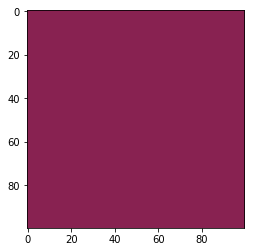

In [10]:
# create 100 x 100 pixel array with average color value
average_color_img = np.array([[average_color]*100]*100, np.uint8)

plt.imshow(average_color_img)

## Taking computations up a notch

In [11]:
mean_kernel = np.ones((5,5),np.float32)/25
vertical_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
horizontal_kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], np.float32)
example = np.array([[0, 1, 2], [2, 2, 0], [0, 1, 2]]) 

In [12]:
print(mean_kernel)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


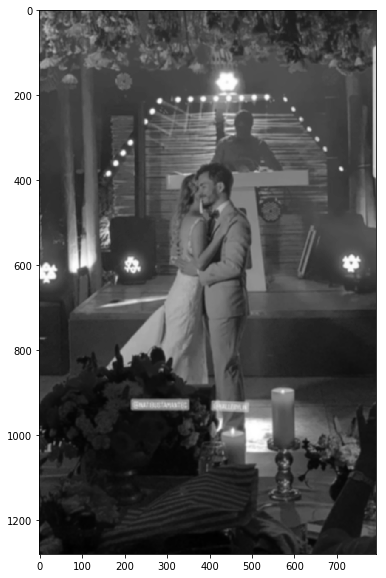

In [13]:
processed_image = cv2.filter2D(gray_img, -1, mean_kernel)
# display image
plt.figure(figsize=(20,10))
plt.imshow(processed_image, cmap='gray')

## What is happening here?

![Url](http://deeplearning.net/software/theano/_images/numerical_no_padding_no_strides.gif "no padding")

In [14]:
print(example)

[[0 1 2]
 [2 2 0]
 [0 1 2]]


### 0x3+1x3+2x2+2x0+2x0+0x1+0x3+1x1+2x2 = 12

But we have a small issue

![Url](http://deeplearning.net/software/theano/_images/no_padding_no_strides.gif "no padding")

![Url](http://deeplearning.net/software/theano/_images/same_padding_no_strides.gif "zero padding")

### 0x0+1x0+2x0+2x0+2x3+0x3+0x0+1x0+2x0 = 6

In [15]:
print(vertical_kernel)

[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]


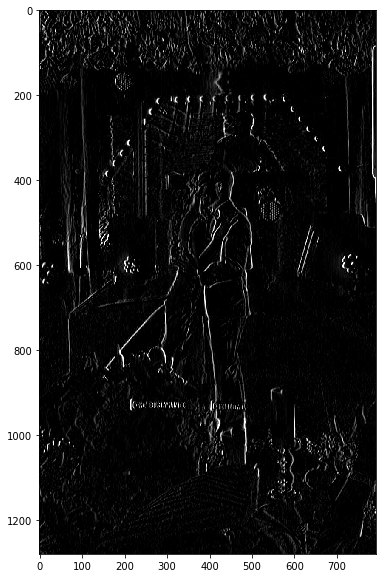

In [16]:
processed_image = cv2.filter2D(gray_img,-1,vertical_kernel)
# display image
plt.figure(figsize=(20,10))
plt.imshow(processed_image, cmap='gray')

In [17]:
print(horizontal_kernel)

[[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]


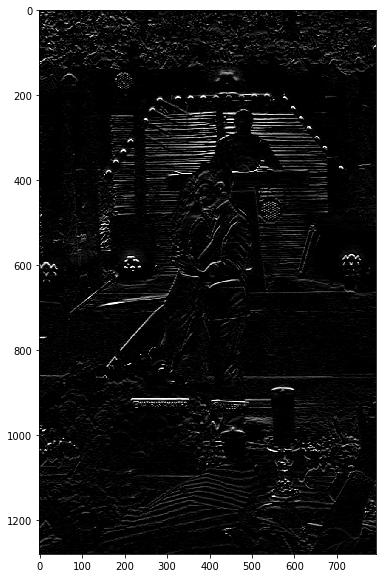

In [18]:
processed_image = cv2.filter2D(gray_img,-1,horizontal_kernel)
# display image
plt.figure(figsize=(20,10))
plt.imshow(processed_image, cmap='gray')

### Non-maximum supression

![url](https://cdn-images-1.medium.com/max/1000/1*CWrXNSbe7s4qSFr5vylyvQ.png "NMS")
![url](https://cdn-images-1.medium.com/max/1000/1*K-gnZg4_VPk57Xs0XflIrg.png "NMS")
![url](https://cdn-images-1.medium.com/max/1000/1*QjoPwEgQ6NOynOwxc4847A.png "NMS")

Source: https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123"

Steps

- Create a matrix initialized to 0 of the same size of the original gradient intensity matrix;
- Identify the edge direction based on the angle value from the angle matrix;
- Check if the pixel in the same direction has a higher intensity than the pixel that is currently processed;
- Return the image processed with the non-max suppression algorithm.

## Edge detection
Canny edge detector on OpenCV. Usage of edge detection versus thresholding to obtain binary image.

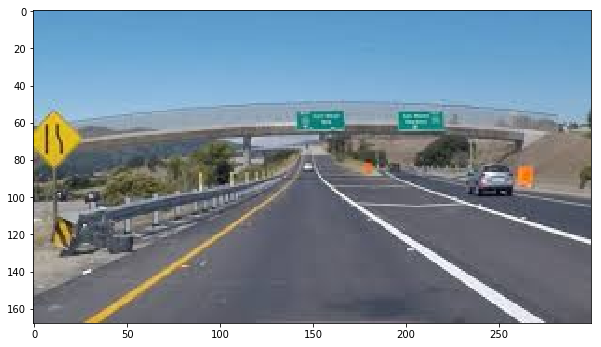

In [19]:
lane = cv2.imread('images/car_lane.jpg')
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(lane, cv2.COLOR_BGR2RGB))

In [20]:
# preprocess by blurring and grayscale
img_preprocessed  = cv2.cvtColor(cv2.GaussianBlur(lane, (7,7), 0), cv2.COLOR_BGR2GRAY)

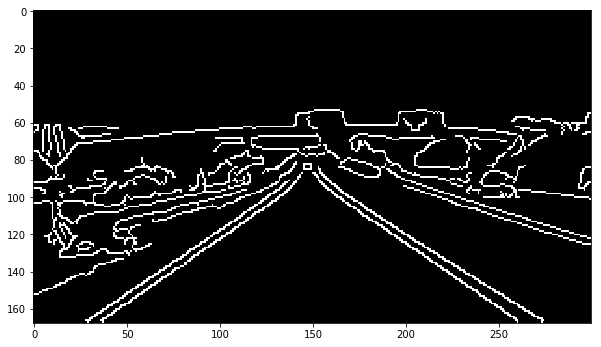

In [21]:
# find binary image with edges
img_edges = cv2.Canny(img_preprocessed, threshold1=60, threshold2=110)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_edges, cv2.COLOR_GRAY2RGB))